### Import libraries and dataset

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from sklearn import preprocessing
import seaborn as sns


pd.set_option('display.max_columns',None, 'display.max_rows',None)

In [3]:
iowatrain = pd.read_csv('../data/train.csv')

iowatrain2 = iowatrain.copy()

### Data Cleansing


#### Beginning Checks

In [38]:
iowatrain2.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [71]:
#Check for missingness('NA') in the dataset
iowatrain2.isna().sum(axis=0)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


#### Data manipulation

In [4]:

#Drop negligible rows with NA
iowatrain2 = iowatrain2.dropna(subset=['MasVnrArea','Electrical'])


#Factorize categorical columns, convert NAs to 'None' category
# for col in ['MSSubClass','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual']:
#     iowatrain2[col] = iowatrain2[col].astype('category').cat.add_categories('None').fillna('None')

#Convert all "object" dtype columns into categorical.
for col in iowatrain2.select_dtypes(include=['object']):
    iowatrain2[col] = iowatrain2[col].astype('category').cat.add_categories('NA').fillna('NA')

#Convert MSSubClass to categorical as well
iowatrain2['MSSubClass'] = iowatrain2.MSSubClass.astype('category')
    
    
#Missing numbers in LotFrontage, then drop LotConfig column
mean_frontage = dict(iowatrain2.groupby("LotConfig")["LotFrontage"].mean())
mean_frontage
iowatrain2.loc[pd.isna(iowatrain2["LotFrontage"]), "LotFrontage"] = iowatrain2.loc[pd.isna(iowatrain2["LotFrontage"]), "LotConfig"].replace(mean_frontage)
iowatrain2 = iowatrain2.drop("LotConfig", axis = 1)


    
#Drop Columns
iowatrain2 = iowatrain2.drop(columns = 'GarageYrBlt')
                             
# ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageCars','GarageCond','PoolArea','PoolQC','Fence','MiscFeature'])



In [122]:
iowatrain2['LotArea'] = np.log(iowatrain2['LotArea'])
iowatrain2['GrLivArea'] = np.log(iowatrain2['GrLivArea'])
iowatrain2['BsmtFinSF1'] = np.log(iowatrain2['BsmtFinSF1'])
iowatrain2['BsmtFinSF2'] = np.log(iowatrain2['BsmtFinSF2'])
iowatrain2['TotalBsmtSF'] = np.log(iowatrain2['TotalBsmtSF'])
iowatrain2['1stFlrSF'] = np.log(iowatrain2['1stFlrSF'])
iowatrain2['GarageArea'] = np.log(iowatrain2['GarageArea'])


In [20]:
continuousfeat = iowatrain2.select_dtypes(include=['int64'])

In [113]:
continuousfeat

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,14115,5,5,1993,1995,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,10382,7,6,1973,1973,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,6120,7,5,1931,1950,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,7420,5,6,1939,1950,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,118000


#### End Checks

In [84]:
#Check for missingness('NA') in the dataset
iowatrain2.isna().sum().sum()

0

In [6]:
iowatrain2.dtypes

Id                  int64
MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          int64
BsmtFinType2     category
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF         int64
Heating     

### EDA Visualizations


#### Round 2

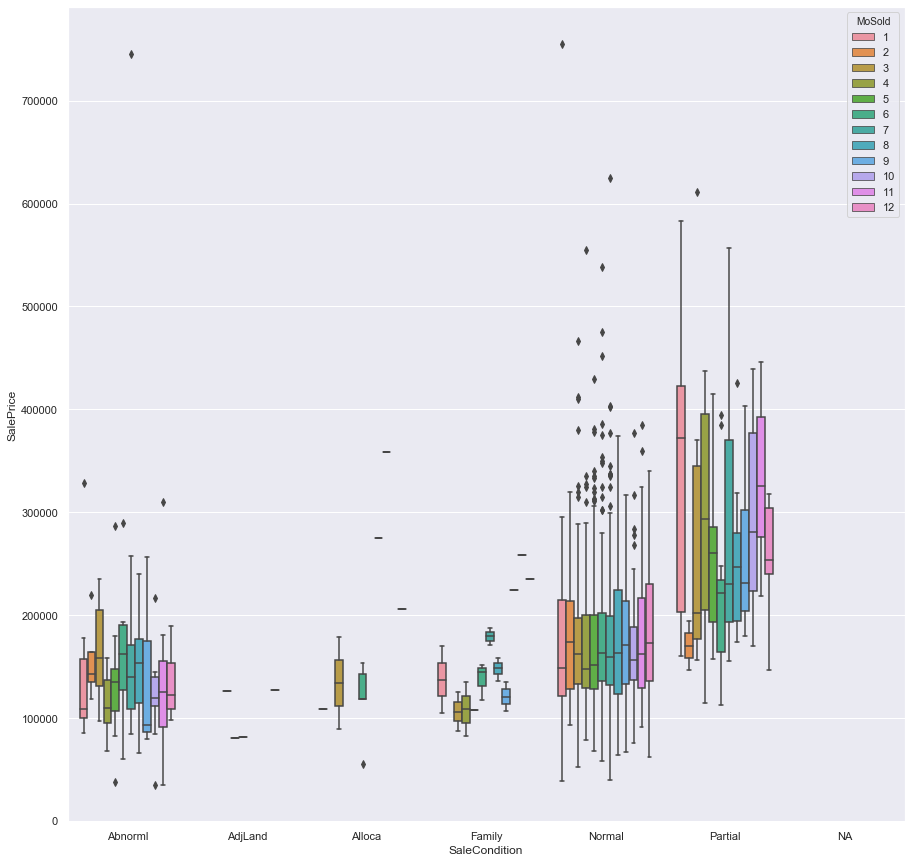

In [12]:
f, ax = plt.subplots(figsize=(15,15))
sns.boxplot(x='SaleCondition',y='SalePrice',hue='MoSold',data=iowatrain2)

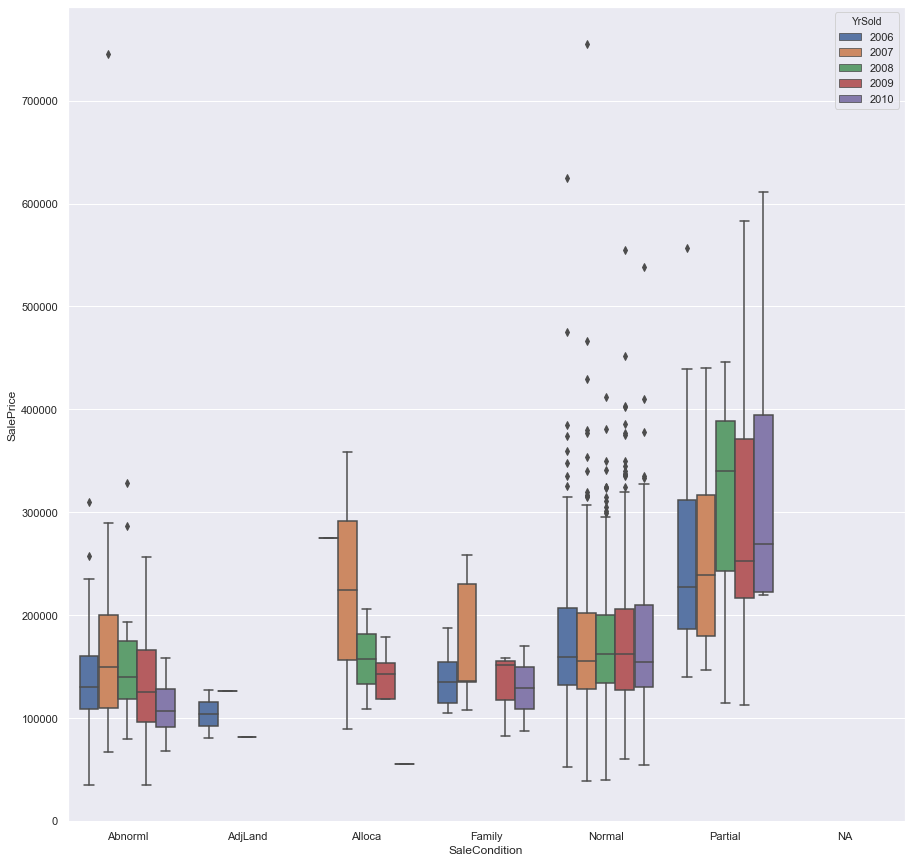

In [17]:
f, ax = plt.subplots(figsize=(15,15))
sns.boxplot(x='SaleCondition',y='SalePrice',hue='YrSold',data=iowatrain2)

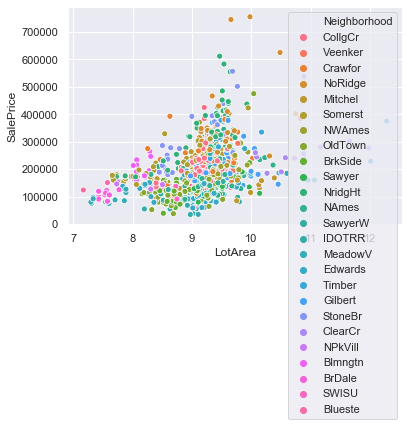

In [135]:
sns.scatterplot(x='LotArea', y = 'SalePrice',hue = 'Neighborhood', data = iowatrain2)

#### Round 1

(array([  2.,   2.,  19.,  84., 121., 138., 144., 148., 159., 144., 144.,
         86.,  72.,  49.,  37.,  28.,  19.,  21.,  10.,   6.,   3.,   5.,
          1.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 334. ,  466.7,  599.4,  732.1,  864.8,  997.5, 1130.2, 1262.9,
        1395.6, 1528.3, 1661. , 1793.7, 1926.4, 2059.1, 2191.8, 2324.5,
        2457.2, 2589.9, 2722.6, 2855.3, 2988. , 3120.7, 3253.4, 3386.1,
        3518.8, 3651.5, 3784.2, 3916.9, 4049.6, 4182.3, 4315. , 4447.7,
        4580.4, 4713.1, 4845.8, 4978.5, 5111.2, 5243.9, 5376.6, 5509.3,
        5642. ]),
 <a list of 40 Patch objects>)

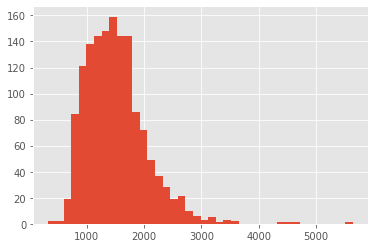

In [110]:
plt.hist(iowatrain2.GrLivArea, bins = 40)

(array([  1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   8.,   2.,   8.,
         13.,  28.,  69.,  62.,  56.,  87.,  80., 107., 107., 109., 134.,
        130., 122.,  84.,  73.,  45.,  42.,  26.,  25.,  12.,   5.,   5.,
          4.,   0.,   0.,   2.,   1.,   0.,   1.]),
 array([5.81114099, 5.88181232, 5.95248364, 6.02315496, 6.09382628,
        6.16449761, 6.23516893, 6.30584025, 6.37651157, 6.4471829 ,
        6.51785422, 6.58852554, 6.65919686, 6.72986819, 6.80053951,
        6.87121083, 6.94188215, 7.01255347, 7.0832248 , 7.15389612,
        7.22456744, 7.29523876, 7.36591009, 7.43658141, 7.50725273,
        7.57792405, 7.64859538, 7.7192667 , 7.78993802, 7.86060934,
        7.93128067, 8.00195199, 8.07262331, 8.14329463, 8.21396596,
        8.28463728, 8.3553086 , 8.42597992, 8.49665125, 8.56732257,
        8.63799389]),
 <a list of 40 Patch objects>)

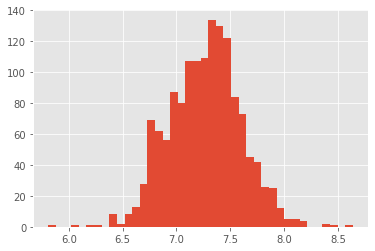

In [111]:
plt.hist(np.log(iowatrain2.GrLivArea), bins = 40)

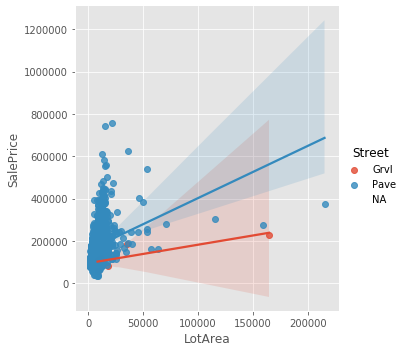

In [83]:
sns.lmplot(x='LotArea', y='SalePrice', hue = 'Street', data = iowatrain2)

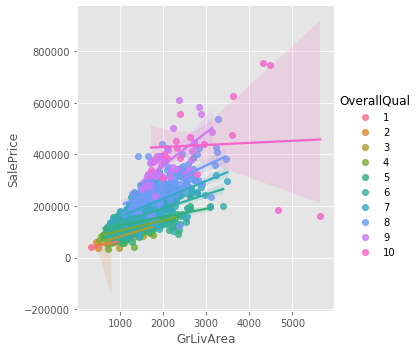

In [88]:
sns.lmplot(x='GrLivArea', y='SalePrice', hue = 'OverallQual', data = iowatrain2)

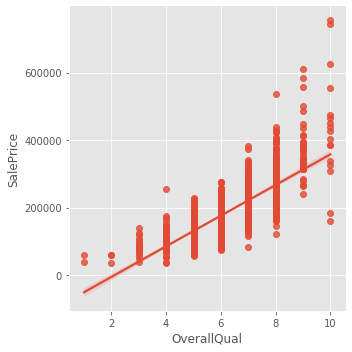

In [87]:
sns.lmplot(x='OverallQual', y='SalePrice', data = iowatrain2)

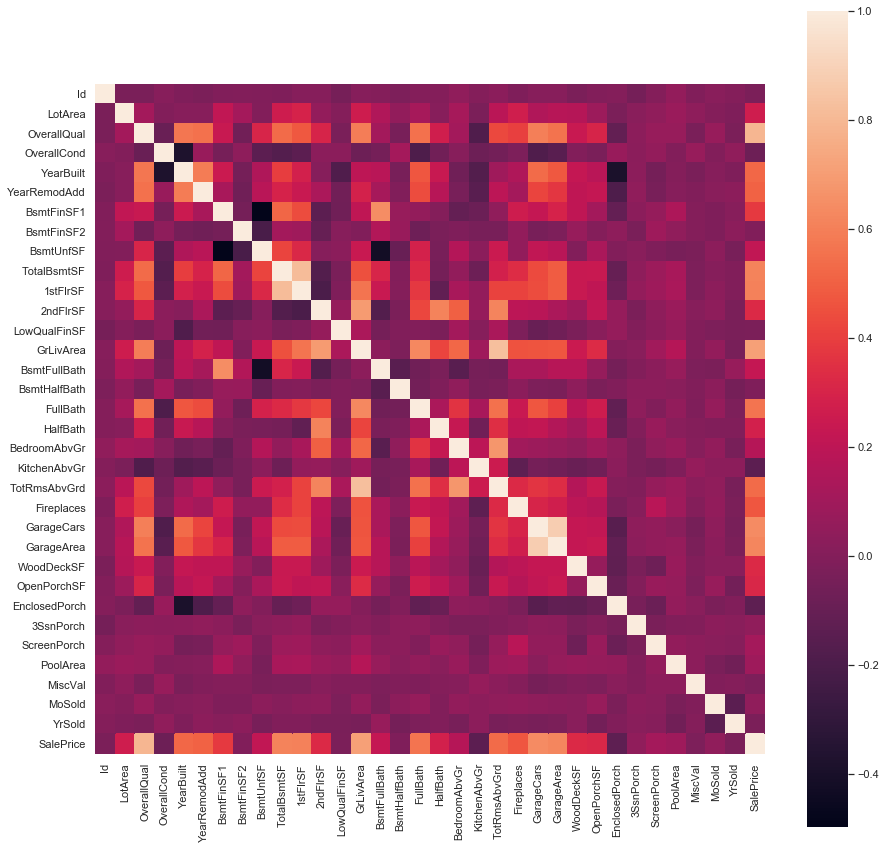

In [21]:
corrplot = continuousfeat.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrplot, square=True)

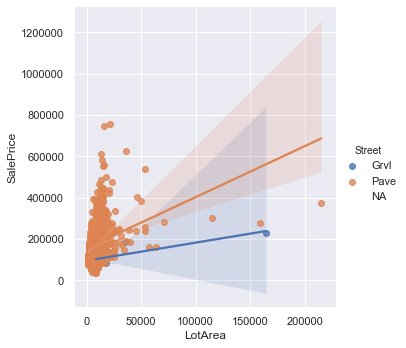

In [22]:
sns.lmplot(x='LotArea', y='SalePrice', hue = 'Street', data = iowatrain2)

### MLR (on continuous features)

In [106]:
continuousMLR = continuousfeat.columns.tolist()






In [ ]:


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split()

from sklearn.linear_model import LinearRegression

ols = linear_model.LinearRegression()


